In [3]:
# --- 必要なライブラリ ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# --- データ読み込み ---
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

In [4]:
# --- 前処理 ---
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['minimum nights'] = pd.to_numeric(df['minimum nights'], errors='coerce')
df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce')
df['reviews per month'] = pd.to_numeric(df['reviews per month'], errors='coerce')
df['calculated host listings count'] = pd.to_numeric(df['calculated host listings count'], errors='coerce')
df['availability 365'] = pd.to_numeric(df['availability 365'], errors='coerce')

In [5]:
# --- ダミー変数作成 ---
manhattan_dummy = (df['neighbourhood group'] == "Manhattan").astype(int)
private_dummy = (df['room type'] == "Private room").astype(int)
home_dummy = (df['room type'] == "Entire home/apt").astype(int)
shared_dummy = (df['room type'] == "Shared room").astype(int)

In [6]:
# --- 分析用データ結合 ---
equation_df = pd.concat([
    manhattan_dummy.rename('manhattan_dummy'),
    private_dummy.rename('private_dummy'),
    home_dummy.rename('home_dummy'),
    shared_dummy.rename('shared_dummy'),
    df['price'].rename('price'),
    df['minimum nights'].rename('minimum_nights'),
    df['number of reviews'].rename('number_of_reviews'),
    df['reviews per month'].rename('reviews_per_month'),
    df['calculated host listings count'].rename('calculated_host_listings_count'),
    df['availability 365'].rename('availability_365')
], axis=1).dropna()

In [7]:
# --- 単回帰分析（例：number_of_reviews） ---
X = sm.add_constant(equation_df['number_of_reviews'])
y = equation_df['price']
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1173
Date:                Fri, 18 Jul 2025   Prob (F-statistic):              0.732
Time:                        02:42:28   Log-Likelihood:            -1.0759e+05
No. Observations:               14880   AIC:                         2.152e+05
Df Residuals:                   14878   BIC:                         2.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               619.7960      3.32

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.pri

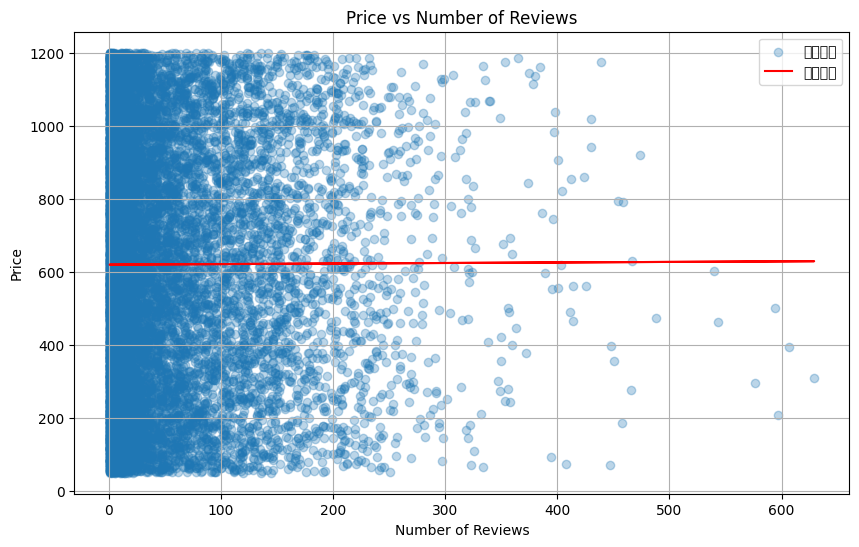

In [8]:
# --- 単回帰 可視化 ---
plt.figure(figsize=(10, 6))
plt.scatter(equation_df['number_of_reviews'], y, alpha=0.3, label='実データ')
plt.plot(equation_df['number_of_reviews'], result.predict(X), color='red', label='回帰直線')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs Number of Reviews')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# --- 重回帰分析 ---
X_all = equation_df.drop(columns='price')
X_all_const = sm.add_constant(X_all)
model_all = sm.OLS(y, X_all_const)
result_all = model_all.fit()
print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.371
Date:                Fri, 18 Jul 2025   Prob (F-statistic):              0.204
Time:                        02:42:36   Log-Likelihood:            -1.0759e+05
No. Observations:               14880   AIC:                         2.152e+05
Df Residuals:                   14871   BIC:                         2.153e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

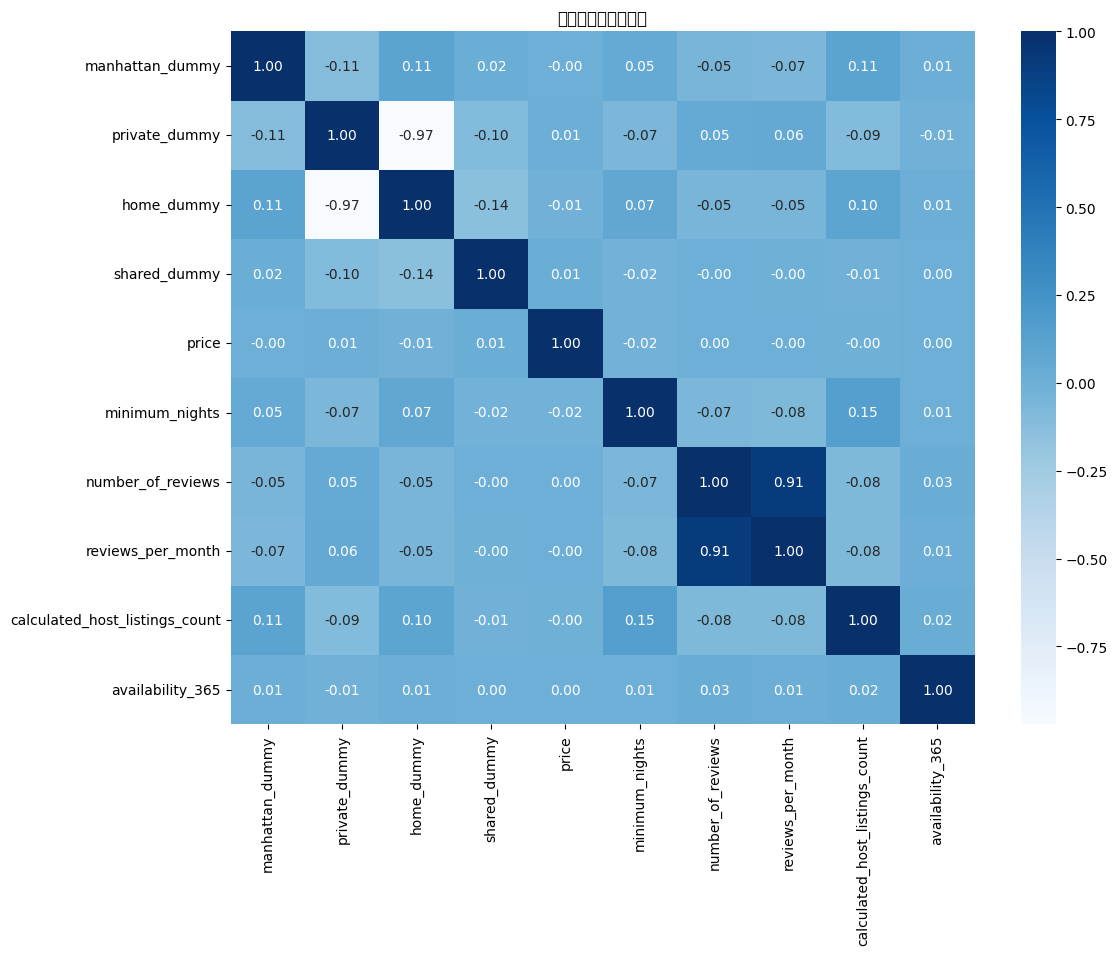

In [10]:
# --- 相関ヒートマップ ---
plt.figure(figsize=(12, 9))
sns.heatmap(equation_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("相関係数マトリクス")
plt.show()